In [ ]:
import pandas as pd
import numpy  as np

#lets import the visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
#Beloww line is used to show the chart's in Jupyter notebook without printing show() method
%matplotlib inline

In [3]:
#import data from local Storage
#THis is Kaggle data and you can found this data from below link 
#https://www.kaggle.com/mchirico/montcoalert
calls_911 = pd.read_csv('D:/DataScience/Kaggle DS/911.csv')

In [6]:
#Let's check the data type
type(calls_911)

pandas.core.frame.DataFrame

In [8]:
#lets check the info of the data Frame
calls_911.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423909 entries, 0 to 423908
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   lat        423909 non-null  float64
 1   lng        423909 non-null  float64
 2   desc       423909 non-null  object 
 3   zip        371780 non-null  float64
 4   title      423909 non-null  object 
 5   timeStamp  423909 non-null  object 
 6   twp        423750 non-null  object 
 7   addr       423909 non-null  object 
 8   e          423909 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 29.1+ MB


In [9]:
#Lets explore the data using head() function
calls_911.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [26]:
#From data lets find out some minor insight that is top 3 Zip, township(twp)
top3_zip = calls_911['zip'].value_counts().head(3)
top3_zip

19401.0    28656
19464.0    27948
19403.0    21631
Name: zip, dtype: int64

In [29]:
top3_twn = calls_911['twp'].value_counts().head(3)
top3_twn

LOWER MERION    36441
ABINGTON        25835
NORRISTOWN      23883
Name: twp, dtype: int64

In [31]:
#Lets find out the unique titles codes in title column
calls_911['title'].unique()

array(['EMS: BACK PAINS/INJURY', 'EMS: DIABETIC EMERGENCY',
       'Fire: GAS-ODOR/LEAK', 'EMS: CARDIAC EMERGENCY', 'EMS: DIZZINESS',
       'EMS: HEAD INJURY', 'EMS: NAUSEA/VOMITING',
       'EMS: RESPIRATORY EMERGENCY', 'EMS: SYNCOPAL EPISODE',
       'Traffic: VEHICLE ACCIDENT -', 'EMS: VEHICLE ACCIDENT',
       'Traffic: DISABLED VEHICLE -', 'Fire: APPLIANCE FIRE',
       'EMS: GENERAL WEAKNESS', 'Fire: CARBON MONOXIDE DETECTOR',
       'EMS: UNKNOWN MEDICAL EMERGENCY', 'EMS: UNRESPONSIVE SUBJECT',
       'Fire: VEHICLE ACCIDENT', 'EMS: ALTERED MENTAL STATUS',
       'Fire: FIRE ALARM', 'EMS: CVA/STROKE',
       'Traffic: ROAD OBSTRUCTION -', 'EMS: SUBJECT IN PAIN',
       'EMS: HEMORRHAGING', 'EMS: FALL VICTIM', 'EMS: ASSAULT VICTIM',
       'EMS: SEIZURES', 'EMS: MEDICAL ALERT ALARM',
       'EMS: ABDOMINAL PAINS', 'Fire: PUMP DETAIL',
       'Fire: FIRE INVESTIGATION', 'EMS: OVERDOSE', 'EMS: MATERNITY',
       'EMS: UNCONSCIOUS SUBJECT', 'EMS: CHOKING', 'EMS: LACERATIONS',
     

In [32]:
#Find the un iques count
len(calls_911['title'].unique())

141

In [35]:
#Another way
calls_911['title'].nunique()

141

In [42]:
#Lets create new column called Reason and filled values from title column.
#For ex. look at the title column and it contains values like this : EMS: BOMB THREAT, so the value before the ":" is the reason
#so the Reason column contains Fire, EMS or so on.
test = calls_911['title'].iloc[0]
test

'EMS: BACK PAINS/INJURY'

In [52]:
#Lets build the logic to find the Reason value
test_list = test.split(':')

In [53]:
#Value is splited in list and index[0] contains the value for reason column 
test_list[0]

'EMS'

In [55]:
#Create the new couln and store value in it using lambda function
calls_911['reason'] = calls_911['title'].apply(lambda title: title.split(':')[0])

In [57]:
calls_911.head(5)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS


In [59]:
calls_911['reason'].head(10)

0        EMS
1        EMS
2       Fire
3        EMS
4        EMS
5        EMS
6        EMS
7        EMS
8        EMS
9    Traffic
Name: reason, dtype: object

In [60]:
#Lets dive into the data and find the most common reason for these calls
calls_911['reason'].value_counts()

EMS        208676
Traffic    151458
Fire        63775
Name: reason, dtype: int64

In [61]:
#So EMS is the most common reason for this

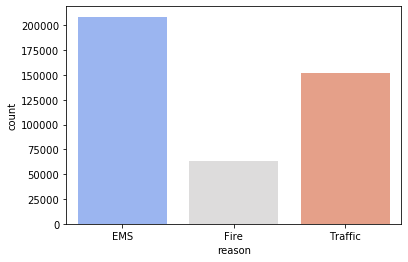

In [68]:
#Lets built the plot for this reason
sns.countplot(x='reason', data = calls_911, palette='coolwarm')

In [69]:
#Lets explore the timeStamp column as time data is very useful data for Data Analysis

In [71]:
#Find out the type of datatype for timeStamp column
type(calls_911['timeStamp'].iloc[0])

str

In [72]:
#timeStamp column contains the stri ng field

In [73]:
#Lets convert the field to timestamp data type
calls_911['timeStamp'] = pd.to_datetime(calls_911['timeStamp'])

In [74]:
#Lets check again its datatype
type(calls_911['timeStamp'].iloc[0])

pandas._libs.tslibs.timestamps.Timestamp

In [75]:
#Now its Timestamp now

In [77]:
#Lets create 3 new column from timeStamp column that is hour, month, day of week
calls_911['hour'] = calls_911['timeStamp'].apply(lambda ts: ts.hour)
calls_911['month'] = calls_911['timeStamp'].apply(lambda ts: ts.month)
calls_911['day of week'] = calls_911['timeStamp'].apply(lambda ts: ts.dayofweek)

In [78]:
calls_911.head(5)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,hour,month,day of week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,3
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,3
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,14,12,3
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,16,12,3
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,16,12,3


In [79]:
#lets replace the day of week from its day name
dmap = {0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'}

In [80]:
calls_911['day of week'] = calls_911['day of week'].map(dmap)

In [81]:
calls_911.head(5)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,hour,month,day of week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thursday
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thursday
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,14,12,Thursday
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,16,12,Thursday
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,16,12,Thursday


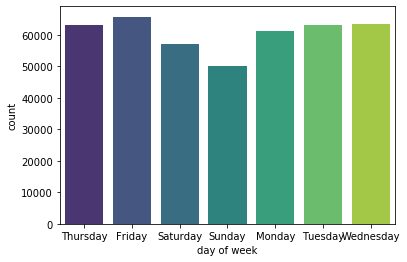

In [88]:
#Lets create the countplot for day of week with reason based hue

#Without hue

sns.countplot('day of week', data = calls_911, palette='viridis')

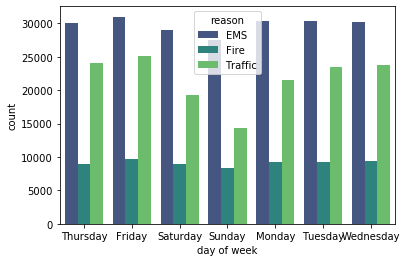

In [89]:
#With hue
sns.countplot('day of week', data = calls_911, hue='reason', palette='viridis')

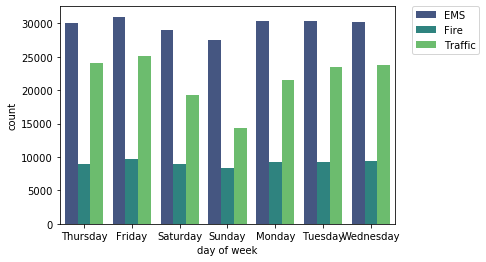

In [105]:
#Relocate the legend
sns.countplot('day of week', data = calls_911, hue='reason', palette='viridis')
plt.legend(bbox_to_anchor = (1.05, 1) , loc = 2, borderaxespad=0)

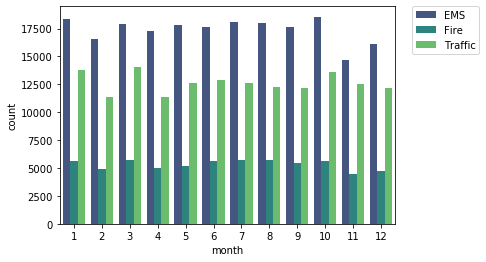

In [106]:
#Lets do the same thing for the month column
sns.countplot('month', data = calls_911, hue='reason', palette='viridis')
plt.legend(bbox_to_anchor = (1.05, 1) , loc = 2, borderaxespad=0)

In [115]:
#Lets group the data by month
month_by = calls_911.groupby('month').count()

In [117]:
month_by.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,hour,day of week
month,,,,,,,,,,,,
1,37824,37824,37824,33480,37824,37824,37812,37824,37824,37824,37824,37824
2,32828,32828,32828,28963,32828,32828,32817,32828,32828,32828,32828,32828
3,37666,37666,37666,33416,37666,37666,37651,37666,37666,37666,37666,37666
4,33583,33583,33583,29488,33583,33583,33575,33583,33583,33583,33583,33583
5,35644,35644,35644,31114,35644,35644,35628,35644,35644,35644,35644,35644


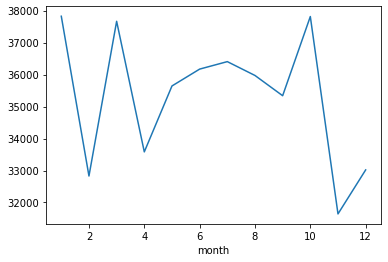

In [119]:
#Lets plot the plot based 'lat' calls per month
month_by['lat'].plot()

In [120]:
#Plot the lmplot on number of calls per month
#zBefore using lmplot we haave to reset the index as in month_by df month is the index and we have to convert into column
month_by.reset_index()

,month,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,hour,day of week
0,1,37824,37824,37824,33480,37824,37824,37812,37824,37824,37824,37824,37824
1,2,32828,32828,32828,28963,32828,32828,32817,32828,32828,32828,32828,32828
2,3,37666,37666,37666,33416,37666,37666,37651,37666,37666,37666,37666,37666
3,4,33583,33583,33583,29488,33583,33583,33575,33583,33583,33583,33583,33583
4,5,35644,35644,35644,31114,35644,35644,35628,35644,35644,35644,35644,35644
5,6,36171,36171,36171,31501,36171,36171,36152,36171,36171,36171,36171,36171
6,7,36405,36405,36405,31863,36405,36405,36391,36405,36405,36405,36405,36405
7,8,35972,35972,35972,31512,35972,35972,35957,35972,35972,35972,35972,35972
8,9,35339,35339,35339,30772,35339,35339,35325,35339,35339,35339,35339,35339
9,10,37815,37815,37815,32919,37815,37815,37809,37815,37815,37815,37815,37815


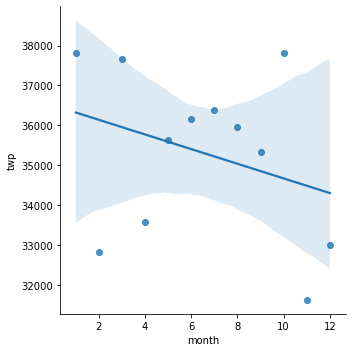

In [126]:
#Now we are good to plt lmplot
sns.lmplot(x='month', y='twp', data = month_by.reset_index())

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,hour,day of week
month,,,,,,,,,,,,
1,37824,37824,37824,33480,37824,37824,37812,37824,37824,37824,37824,37824
2,32828,32828,32828,28963,32828,32828,32817,32828,32828,32828,32828,32828
3,37666,37666,37666,33416,37666,37666,37651,37666,37666,37666,37666,37666
4,33583,33583,33583,29488,33583,33583,33575,33583,33583,33583,33583,33583
5,35644,35644,35644,31114,35644,35644,35628,35644,35644,35644,35644,35644
6,36171,36171,36171,31501,36171,36171,36152,36171,36171,36171,36171,36171
7,36405,36405,36405,31863,36405,36405,36391,36405,36405,36405,36405,36405
8,35972,35972,35972,31512,35972,35972,35957,35972,35972,35972,35972,35972
9,35339,35339,35339,30772,35339,35339,35325,35339,35339,35339,35339,35339


In [129]:
#Create new column date from timeStamp col. to show number of calls per date
calls_911['date'] = calls_911['timeStamp'].apply(lambda ts : ts.date())


In [130]:
calls_911.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,hour,month,day of week,date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thursday,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thursday,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,14,12,Thursday,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,16,12,Thursday,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,16,12,Thursday,2015-12-10


In [131]:
#lets group data by date column
calls_911.groupby('date').count()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,hour,month,day of week
date,,,,,,,,,,,,,
2015-12-10,114,114,114,100,114,114,114,114,114,114,114,114,114
2015-12-11,391,391,391,332,391,391,391,391,391,391,391,391,391
2015-12-12,402,402,402,334,402,402,402,402,402,402,402,402,402
2015-12-13,316,316,316,279,316,316,316,316,316,316,316,316,316
2015-12-14,444,444,444,386,444,444,443,444,444,444,444,444,444
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-11-12,438,438,438,389,438,438,438,438,438,438,438,438,438
2018-11-13,437,437,437,371,437,437,436,437,437,437,437,437,437
2018-11-14,401,401,401,350,401,401,400,401,401,401,401,401,401


In [132]:
#lets dind the calls count on lat as per date
calls_911.groupby('date').count()['lat']

date
2015-12-10     114
2015-12-11     391
2015-12-12     402
2015-12-13     316
2015-12-14     444
              ... 
2018-11-12     438
2018-11-13     437
2018-11-14     401
2018-11-15    1662
2018-11-16     156
Name: lat, Length: 1073, dtype: int64

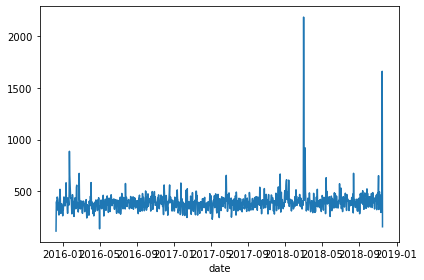

In [136]:
#lets plot the above data
calls_911.groupby('date').count()['lat'].plot()
plt.tight_layout()

<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

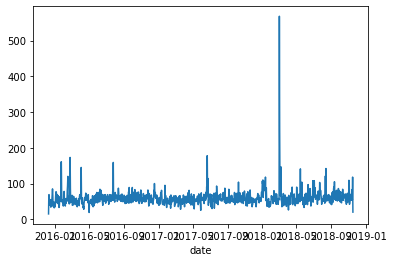

In [140]:
#Lets plot the time-series plot for fire reason date wise
calls_911[calls_911['reason'] == 'Fire'].groupby('date').count()['lat'].plot()
plt.tight_layout

In [142]:
#lets create the heat map where columns will be hour and index will be day of week
calls_911.groupby(by = ['day of week', 'hour']).count()

lat   lng  desc   zip  title  timeStamp   twp  addr     e  \
day of week hour                                                               
Friday      0     1185  1185  1185  1052   1185       1185  1184  1185  1185   
            1     1001  1001  1001   885   1001       1001   998  1001  1001   
            2      930   930   930   838    930        930   930   930   930   
            3      832   832   832   754    832        832   832   832   832   
            4      821   821   821   761    821        821   820   821   821   
...                ...   ...   ...   ...    ...        ...   ...   ...   ...   
Wednesday   19    2927  2927  2927  2577   2927       2927  2927  2927  2927   
            20    2645  2645  2645  2355   2645       2645  2643  2645  2645   
            21    2236  2236  2236  1988   2236       2236  2232  2236  2236   
            22    1794  1794  1794  1572   1794       1794  1793  1794  1794   
            23    1399  1399  1399  1246   1399       1399  1396  1399  1399   

                  reason  month  date  
day of week hour                       
Friday      0       1185   1185  1185  
            1       1001   1001  1001  
            2        930    930   930  
            3        832    832   832  
            4        821    821   821  
...                  ...    ...   ...  
Wednesday   19      2927   2927  2927  
            20      2645   2645  2645  
            21      2236   2236  2236  
            22      1794   1794  1794  
            23      1399   1399  1399  

[168 rows x 12 columns]

In [145]:
#Above df is multi-level index lets break down it in matrix form for 'reason' col.
res_dayHour = calls_911.groupby(by= ['day of week', 'hour']).count()['reason'].unstack()

In [146]:
res_dayHour

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
day of week,,,,,,,,,,,,,,,,,,,,,
Friday,1185,1001,930,832,821,1051,1676,2689,3185,3295,...,4150,4514,4711,4489,3616,3254,2789,2445,2210,1866
Monday,1207,974,857,784,871,1124,1729,2829,3588,3685,...,3547,3975,4063,4003,3512,2821,2418,2005,1698,1283
Saturday,1515,1332,1206,1012,936,985,1230,1640,2211,2766,...,3479,3284,3348,3274,3174,3036,2632,2432,2073,1913
Sunday,1520,1331,1263,1033,954,941,1119,1568,1933,2421,...,2992,2828,2855,2872,2829,2679,2362,1994,1632,1470
Thursday,1115,873,920,775,784,1091,1801,2913,3468,3457,...,3904,4139,4053,4412,3578,2923,2579,2230,1784,1486
Tuesday,1086,918,812,783,824,1075,1806,2912,3650,3563,...,3831,4087,4265,4396,3753,2960,2535,2147,1705,1350
Wednesday,1022,952,808,795,711,1040,1763,3060,3566,3528,...,3933,4149,4443,4487,3609,2927,2645,2236,1794,1399


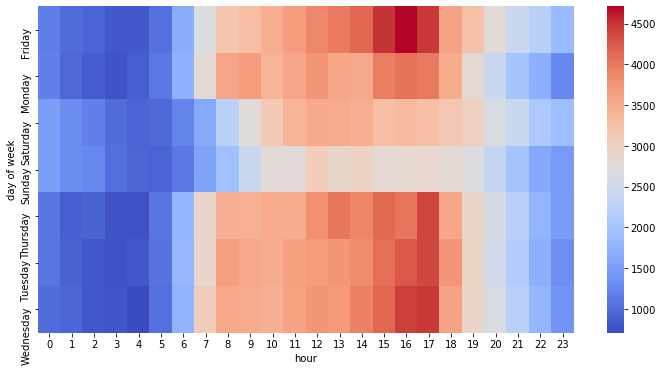

In [154]:
#Heat map for reason based on day of week and hour
plt.figure(figsize=(12,6))
sns.heatmap(res_dayHour, cmap='coolwarm')

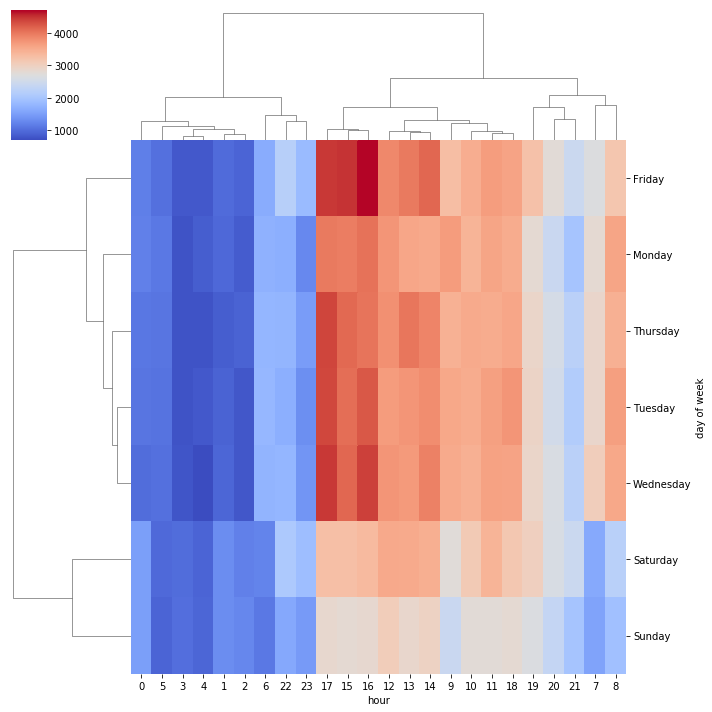

In [157]:
#clustermap

sns.clustermap(res_dayHour, cmap='coolwarm')

In [ ]:
#Its clear from above map that most of the calls are happened in monday, tuesday, wednesday, thursday, friday